In [4]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

In [151]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(6, activation='tanh'),
    layers.Dense(6, activation='tanh'),
    # layers.Dense(2, activation='tanh'),
    layers.Dense(1, activation='sigmoid'),
])
model.build()
model.summary()

model.compile(loss=losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.2))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [154]:
epochs = 10

tx = [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ]
ty = [0, 1, 1, 0]

print(tx)
print(ty)

history = model.fit(
    tx, ty,
    epochs=epochs,
    verbose=2)

[[0, 0], [0, 1], [1, 0], [1, 1]]
[0, 1, 1, 0]
Epoch 1/10
1/1 - 0s - loss: 0.0969 - 2ms/epoch - 2ms/step
Epoch 2/10
1/1 - 0s - loss: 0.0684 - 2ms/epoch - 2ms/step
Epoch 3/10
1/1 - 0s - loss: 0.0450 - 2ms/epoch - 2ms/step
Epoch 4/10
1/1 - 0s - loss: 0.0319 - 2ms/epoch - 2ms/step
Epoch 5/10
1/1 - 0s - loss: 0.0254 - 2ms/epoch - 2ms/step
Epoch 6/10
1/1 - 0s - loss: 0.0200 - 2ms/epoch - 2ms/step
Epoch 7/10
1/1 - 0s - loss: 0.0144 - 3ms/epoch - 3ms/step
Epoch 8/10
1/1 - 0s - loss: 0.0095 - 2ms/epoch - 2ms/step
Epoch 9/10
1/1 - 0s - loss: 0.0060 - 2ms/epoch - 2ms/step
Epoch 10/10
1/1 - 0s - loss: 0.0041 - 2ms/epoch - 2ms/step


[0.03, 0.928, 0.964, 0.069]


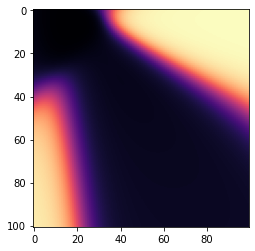

In [155]:
y = model.predict(x=[
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

prec = 10**3
print([round(i[0] * prec)/prec for i in y])

import matplotlib.pyplot as plt

res = 100
heat_in = []
for y in range(res+1):
    yy = y/res
    for x in range(res+1):
        xx = x/res
        heat_in.append([xx, yy])
    print('%s/%s'%(y,res), end='\r')

heat_flat = model.predict(heat_in)
heat = []
for y in range(res+1):
    l = res+1
    s = y*l
    row = heat_flat[s:s+res]
    heat.append(row)


fig, ax = plt.subplots()
im = ax.imshow(heat, cmap='magma')
plt.show()

In [158]:
import numpy as np

tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    layers.Input(shape=(2,)),
    # layers.Dense(6, activation='tanh'),
    # layers.Dense(6, activation='tanh'),
    layers.Dense(2, activation='tanh'),
    layers.Dense(1, activation='sigmoid'),
])
model.build()
model.summary()

model.compile(loss=losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.2))

ty = np.asarray([i[0] for i in heat_flat])
tx = np.asarray(heat_in)

epochs = 10

history = model.fit(
    tx, ty,
    epochs=epochs,
    verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
319/319 - 1s - loss: 0.0333 - 676ms/epoch - 2ms/step
Epoch 2/10
319/319 - 0s - loss: 0.0068 - 488ms/epoch - 2ms/step
Epoch 3/10
319/319 - 0s - loss: 0.0068 - 480ms/epoch - 2ms/step
Epoch 4/10
319/319 - 1s - loss: 0.0071 - 513ms/epoch - 2ms/step
Epoch 5/10
319/319 - 0s - loss: 0.0069 - 498ms/epoch - 2ms/step
Epoch 6/10
319/319 - 1s - loss: 0.0070 - 508ms/epoch - 2ms/step
Epoch 7/10
319/319 - 0s - loss: 0.0067 - 474ms/epoch - 1ms/step
Epoch 8/10

[0.192, 0.897, 0.928, 0.092]


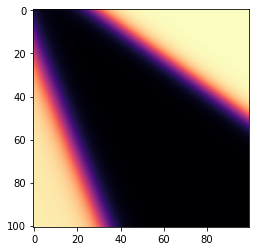

In [159]:
y = model.predict(x=[
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

prec = 10**3
print([round(i[0] * prec)/prec for i in y])

import matplotlib.pyplot as plt

res = 100
heat_in = []
for y in range(res+1):
    yy = y/res
    for x in range(res+1):
        xx = x/res
        heat_in.append([xx, yy])
    print('%s/%s'%(y,res), end='\r')

heat_flat = model.predict(heat_in)
heat = []
for y in range(res+1):
    l = res+1
    s = y*l
    row = heat_flat[s:s+res]
    heat.append(row)


fig, ax = plt.subplots()
im = ax.imshow(heat, cmap='magma')
plt.show()